Simple Chatbot using GROQ

In [68]:
#Reducers
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from typing import Annotated
from langgraph.graph import StateGraph, START, END

In [69]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [70]:
import os 
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [71]:
from langchain_groq import ChatGroq 

llm = ChatGroq(model_name="llama-3.1-8b-instant",temperature=0.7)

llm.invoke("What is the capital of Nepal?")

AIMessage(content='The capital of Nepal is Kathmandu.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 42, 'total_tokens': 52, 'completion_time': 0.013333333, 'prompt_time': 0.002019451, 'queue_time': 0.219332539, 'total_time': 0.015352784}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_8ab2e50475', 'finish_reason': 'stop', 'logprobs': None}, id='run--496b522a-61ed-4b64-addd-06bc430c7a08-0', usage_metadata={'input_tokens': 42, 'output_tokens': 10, 'total_tokens': 52})

Creating Nodes

In [72]:
def chat_bot(state:State):
    """Chatbot that responds to user messages."""
    return {"messages" : [llm.invoke(state["messages"])]}

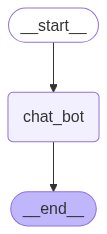

In [73]:
graph = StateGraph(State)

#node
graph.add_node("chat_bot",chat_bot)

#edges
graph.add_edge(START, "chat_bot")
graph.add_edge("chat_bot", END)

#compile the graph
build_graph = graph.compile()

#Display the graph

from IPython.display import display,Image

display(Image(build_graph.get_graph().draw_mermaid_png()))

In [74]:
build_graph.invoke({"messages": ["What is the capital of United States?"]})

{'messages': [HumanMessage(content='What is the capital of United States?', additional_kwargs={}, response_metadata={}, id='dc4ff557-fde5-4221-9139-a6db1e02d7df'),
  AIMessage(content='The capital of the United States is Washington, D.C. (District of Columbia).', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 43, 'total_tokens': 61, 'completion_time': 0.024, 'prompt_time': 0.002804291, 'queue_time': 0.219156859, 'total_time': 0.026804291}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_510c177af0', 'finish_reason': 'stop', 'logprobs': None}, id='run--eb3d7932-305a-4098-a4ac-a471ca44d383-0', usage_metadata={'input_tokens': 43, 'output_tokens': 18, 'total_tokens': 61})]}

In [75]:
#Streaming the response

for response in build_graph.stream({"messages": ["What is the capital of United States?"]}, stream_mode="values"):
    print(response)

{'messages': [HumanMessage(content='What is the capital of United States?', additional_kwargs={}, response_metadata={}, id='16990c95-9036-41eb-ae69-54eae650f1d8')]}
{'messages': [HumanMessage(content='What is the capital of United States?', additional_kwargs={}, response_metadata={}, id='16990c95-9036-41eb-ae69-54eae650f1d8'), AIMessage(content='The capital of the United States is Washington, D.C. (short for District of Columbia).', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 43, 'total_tokens': 63, 'completion_time': 0.026666667, 'prompt_time': 0.002136493, 'queue_time': 0.219606569, 'total_time': 0.02880316}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_0f5c9bc037', 'finish_reason': 'stop', 'logprobs': None}, id='run--ff37b5d9-c0a0-45cb-9186-d5e4d97514b2-0', usage_metadata={'input_tokens': 43, 'output_tokens': 20, 'total_tokens': 63})]}
